In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Task: Use Python to make HTTP/API calls to NOAA services and obtain data.

import requests
import json
import os
from datetime import datetime, timedelta

# API key
api_key = "mQSiRTLMUGQVBOUFesgydXDripQkqBmI"

# Denver International Airport (zipcode 80249)
location_id = "ZIP:80249"

# Folder to store JSON files
folder_path = "./homework/hw0/data/"

In [3]:
# Create the 'data/' folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [4]:
# Date ranges
date_ranges = [
    {"start": "2008-12-15", "end": "2009-01-21"},
    {"start": "2009-12-15", "end": "2010-01-21"},
    {"start": "2010-12-15", "end": "2011-01-21"},
    {"start": "2011-12-15", "end": "2012-01-21"},
    {"start": "2012-12-15", "end": "2013-01-21"},
    {"start": "2013-12-15", "end": "2014-01-21"},
    {"start": "2014-12-15", "end": "2015-01-21"},
    {"start": "2015-12-15", "end": "2016-01-21"},
    {"start": "2016-12-15", "end": "2017-01-21"},
    {"start": "2017-12-15", "end": "2018-01-21"},
    {"start": "2018-12-15", "end": "2019-01-21"},
    {"start": "2019-12-15", "end": "2020-01-21"},
    {"start": "2020-12-15", "end": "2021-01-21"},
    {"start": "2021-12-15", "end": "2022-01-21"},
]

In [5]:
# Function to make API calls and save data to a JSON file
def get_and_save_data(start_date, end_date, file_name):
    base_url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"
    params = {
        "datasetid": "GHCND",
        "locationid": location_id,
        "startdate": start_date,
        "enddate": end_date,
        "units": "standard",
        "limit": 1000,
    }
    headers = {"token": api_key}

    response = requests.get(base_url, params=params, headers=headers)

    if response.status_code == 200:
        data = response.json()
        with open(folder_path + file_name, "w") as json_file:
            json.dump(data, json_file, indent=2)
        print(f"Data for {start_date} to {end_date} saved in {file_name}")
    else:
        print(f"Error: Unable to fetch data for {start_date} to {end_date}")



In [6]:
# Loop through date ranges and make API calls
for date_range in date_ranges:
    start_date = date_range["start"]
    end_date = date_range["end"]
    file_name = f"winter_{start_date[:4]}-{end_date[:4]}.json"

    get_and_save_data(start_date, end_date, file_name)

Data for 2008-12-15 to 2009-01-21 saved in winter_2008-2009.json
Data for 2009-12-15 to 2010-01-21 saved in winter_2009-2010.json
Data for 2010-12-15 to 2011-01-21 saved in winter_2010-2011.json
Data for 2011-12-15 to 2012-01-21 saved in winter_2011-2012.json
Data for 2012-12-15 to 2013-01-21 saved in winter_2012-2013.json
Data for 2013-12-15 to 2014-01-21 saved in winter_2013-2014.json
Data for 2014-12-15 to 2015-01-21 saved in winter_2014-2015.json
Data for 2015-12-15 to 2016-01-21 saved in winter_2015-2016.json
Data for 2016-12-15 to 2017-01-21 saved in winter_2016-2017.json
Data for 2017-12-15 to 2018-01-21 saved in winter_2017-2018.json
Data for 2018-12-15 to 2019-01-21 saved in winter_2018-2019.json
Data for 2019-12-15 to 2020-01-21 saved in winter_2019-2020.json
Data for 2020-12-15 to 2021-01-21 saved in winter_2020-2021.json
Data for 2021-12-15 to 2022-01-21 saved in winter_2021-2022.json


In [7]:
#Task: Extract, transform and export JSON data.

#Combine all the JSON files into a single CSV file with columns for TMAX, TMIN, and calculated TAVG:
import pandas as pd
from datetime import datetime

# Read JSON files and combine into a single DataFrame
data_frames = []
for date_range in date_ranges:
    start_date = date_range["start"]
    end_date = date_range["end"]
    file_name = f"winter_{start_date[:4]}-{end_date[:4]}.json"

    with open(folder_path + file_name) as json_file:
        data = json.load(json_file)
        df = pd.json_normalize(data["results"])
        data_frames.append(df)
combined_df = pd.concat(data_frames, ignore_index=True)

In [8]:
# Convert 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [9]:
import pandas as pd
#from pandas import DataFrame 
from datetime import datetime

# Pivot the datatype column
pivoted_df = combined_df.pivot_table(index='date', columns='datatype', values='value', aggfunc='mean')
pivoted_df.head(60)
# Reset the index to make 'date' a column again
pivoted_df.reset_index(inplace=True)
df.head(60)
#type(pivoted_df)
combined_df = pd.DataFrame(pivoted_df, columns = ['date', 'TMAX', 'TMIN']) 

#  Save to CSV
# pivoted_df.to_csv(folder_path + 'all_data_max_min.csv', index=False)
# Convert 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Calculate TAVG
combined_df['TAVG'] = (combined_df['TMAX'] + combined_df['TMIN']) / 2
# Convert 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])
# Save to CSV
combined_df.to_csv(folder_path + 'all_data_max_min_avg.csv')

In [10]:
combined_df.head(30)

,date,TMAX,TMIN,TAVG
0,2008-12-15,2.0,-19.0,-8.5
1,2008-12-16,34.0,-8.0,13.0
2,2008-12-17,37.0,14.0,25.5
3,2008-12-18,28.0,5.0,16.5
4,2008-12-19,44.0,14.0,29.0
5,2008-12-20,27.0,4.0,15.5
6,2008-12-21,19.0,0.0,9.5
7,2008-12-22,29.0,1.0,15.0
8,2008-12-23,28.0,10.0,19.0
9,2008-12-24,40.0,14.0,27.0


In [11]:
# Task: Filter, transform and export CSV data.
#Copy dataframe for furthur transforation
combined_df_c= combined_df
import pandas as pd

combined_df_c['year'] = combined_df_c['date'].dt.year

# Extract month-day from the 'date' column
combined_df_c['month_day'] = combined_df_c['date'].dt.strftime('%m-%d')

# Pivot the DataFrame
pivot_df = combined_df_c.pivot_table(index='month_day', columns='year', values='TAVG', aggfunc='first')
pivot_df1=pivot_df
pivot_df1.columns = ['2008-2009'] + [f'{year}-{year + 1}' for year in pivot_df1.columns[1:]]
print(pivot_df)
print("testing")
print(pivot_df1)

# Save to CSV
pivot_df.to_csv(folder_path + 'all_data_min.csv')


           2008-2009  2009-2010  2010-2011  2011-2012  2012-2013  2013-2014  \
month_day                                                                     
01-01            NaN       45.0       26.0       10.5       27.0       16.0   
01-02            NaN       47.5       28.0       25.0       36.0       23.0   
01-03            NaN       30.5       26.0       18.0       41.5       23.0   
01-04            NaN       17.0       23.5       22.5       41.5       31.0   
01-05            NaN       27.0       33.0       31.5       52.5       26.5   
01-06            NaN       33.0       18.0       39.0       36.0       30.0   
01-07            NaN       41.0       -1.5       32.5       30.5       37.5   
01-08            NaN       46.5       11.0       35.0       27.0       39.5   
01-09            NaN       31.5       25.0       24.5       37.0       41.0   
01-10            NaN       32.0       32.0        4.5       45.5       35.5   
01-11            NaN       32.5       34.0        5.

In [12]:
# Task: Write functions to compute temperature averages.
combined_df_c2 = combined_df
combined_df_c2['date'] = pd.to_datetime(combined_df_c2['date'])


# Function to compute average of the DataFrame
def average(df):
    return df['TAVG'].mean()

# Function to compute average of maximum 'TMAX'
def average_high(df):
    return df['TMAX'].mean()

# Function to compute average of minimum 'TMIN'
def average_low(df):
    return df['TMIN'].mean()
print("Average of the DataFrame:", average(combined_df_c2))
print("Average of maximum 'TMAX':", average_high(combined_df_c2))
print("Average of minimum 'TMIN':", average_low(combined_df_c2))

Average of the DataFrame: 30.655038759689923
Average of maximum 'TMAX': 43.866279069767444
Average of minimum 'TMIN': 17.4437984496124


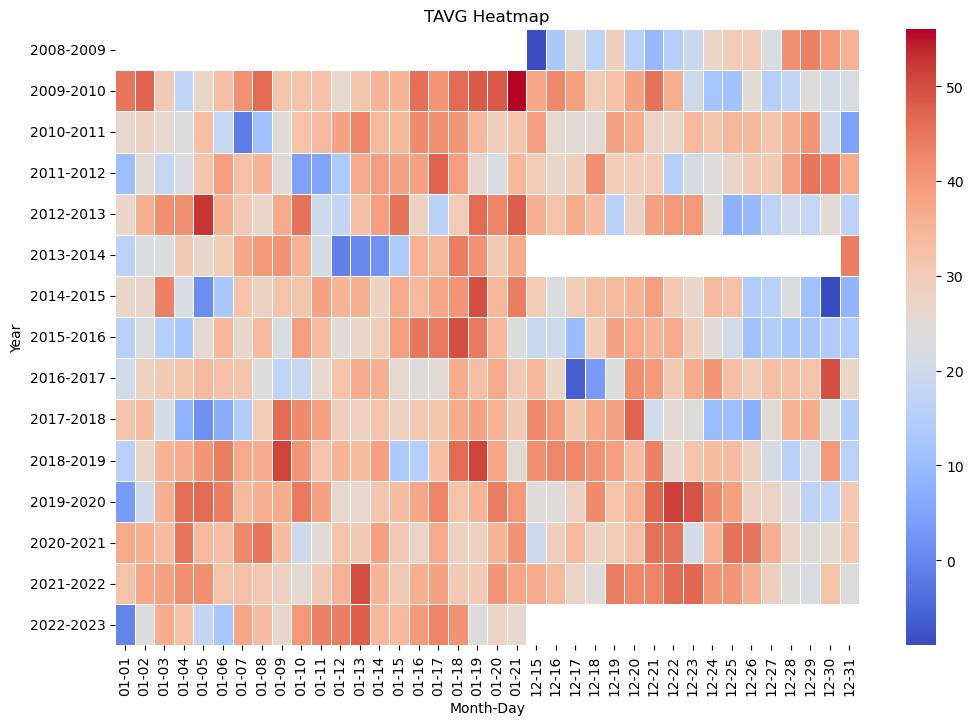

In [13]:
# Task: BONUS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_Map=combined_df
df_Map['year'] = df_Map['year'].astype(str) + '-' + (df_Map['year'] + 1).astype(str)
# Pivot the data to create a matrix for the heatmap
heatmap_data = df_Map.pivot_table(values='TAVG', index='year', columns='month_day', aggfunc='mean')

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
#sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
sns.heatmap(heatmap_data, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('TAVG Heatmap')
plt.xlabel('Month-Day')
plt.ylabel('Year')
plt.show()